<a href="https://colab.research.google.com/github/iamajarpit/weather-api/blob/main/WEATHER_WEB_SCRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests-html


In [ ]:
pip install pillow


Enter the city name: indore
The Current Weather in indore is: 27°C, Cloudy
Saturday 5:00 PM


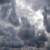

In [ ]:
from requests_html import HTMLSession
from PIL import Image as PILImage
from IPython.display import Image, display
import os

# Initialize the session
s = HTMLSession()

# Get the city name from the user
city = input("Enter the city name: ")

# Construct the URL
url = f'https://www.google.com/search?q=weather+{city}'

# Get the response from the URL
r = s.get(url, headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36',
    "Accept-Language": "en-US,en;q=0.9,ar;q=0.8"
})

# Extract temperature and other weather details
temp = r.html.find('span#wob_tm', first=True).text
unit = r.html.find('div.vk_bk.wob-unit span.wob_t', first=True).text
desc = r.html.find('div.VQF4g', first=True).find('span#wob_dc', first=True).text
day = r.html.find('div.wob_dts', first=True).text

# Convert Fahrenheit to Celsius
def fahrenheit_to_celsius(fahrenheit):
    celsius = int((fahrenheit - 32) * 5 / 9)
    return celsius

# Convert temperature from string to integer
fahrenheit_temp = int(temp)

# Convert the temperature to Celsius if needed
if unit == '°F':
    temp_in_celsius = fahrenheit_to_celsius(fahrenheit_temp)
else:
    temp_in_celsius = temp  # If the unit is already in Celsius

# Mapping of weather descriptions to local image file paths
weather_icons = {
    "lightning": "/content/Lightning.jpg",
    "Sunny": "/content/SUNNY.jpg",
    "Cloudy": "/content/cloudy.jpg",
    "Rain": "/content/RAIN.jpg",
    "Thunderstorm": "/content/THUNDERSTORM.jpeg",
    "Mostly sunny": "/content/mostly sunny.jpeg"

    # Add more mappings as needed
}

# Get the appropriate icon for the weather description
icon_path = weather_icons.get(desc, "path_to_your_images/default.png")

# Print the weather details
print(f"The Current Weather in {city} is: {temp_in_celsius}°C, {desc}")
print(day)

# Display the weather icon
if os.path.exists(icon_path):
    img = PILImage.open(icon_path)
    img = img.resize((50, 50))  # Resize to 50x50 pixels or any other size you prefer
    display(img)
else:
    print("Icon not found")
